For my capstone I scraped 12,000 tweets from the New York Times, Washington Post, Mashable, and Buzzfeed.  

In [4]:
%%html
<div class='tableauPlaceholder' id='viz1488366220658' style='position: relative'><noscript><a href='#'><img alt='Feature Importance for Re-Tweets ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneFeatureImportance&#47;Sheet14&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='CapstoneFeatureImportance&#47;Sheet14' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneFeatureImportance&#47;Sheet14&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488366220658');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Below is the mean polarity across my news sources 

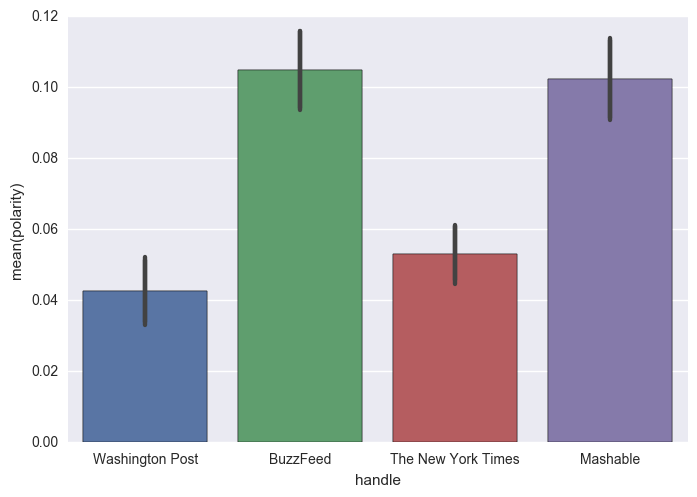

In [62]:
sns.barplot(x = 'handle', y = 'polarity', data = tweet)
plt.show()

In [46]:
run_model(pipelineBNB5, Xtt5_train, Xtt5_test, ytt5_train, ytt5_test)

0.715
      0     1
0  1141   393
1   462  1004
             precision    recall  f1-score   support

          0       0.71      0.74      0.73      1534
          1       0.72      0.68      0.70      1466

avg / total       0.72      0.71      0.71      3000



In [ ]:

class twitterminer():

    request_limit   =   20    
    api             =   False
    data            =   []
    
    twitter_keys = {
        'consumer_key':        'bejMZ1a23iilm782o1ZtlsY80',
        'consumer_secret':     '4whnR4YlZFooqGgiUOxf0BY454Bd9nEbDcfHwRQ6LMxnnS9SdA',
        'access_token_key':    '3314826759-P8IrjCXKEd7w2mKMQ1O3wyDHv3yJXZc2tks0UXl',
        'access_token_secret': 'zIfE0Wesx9ptYlrjmVgkLVG1WrAS5El7I79meC5rsCGLG'
    }
    
    def __init__(self,  request_limit = 20):
        
        self.request_limit = request_limit
        
        # This sets the twitter API object for use internall within the class
        self.set_api()
        
    def set_api(self):
        
        self.api = twitter.Api(
            consumer_key         =   self.twitter_keys['consumer_key'],
            consumer_secret      =   self.twitter_keys['consumer_secret'],
            access_token_key     =   self.twitter_keys['access_token_key'],
            access_token_secret  =   self.twitter_keys['access_token_secret']
        )

    def mine_user_tweets(self, user="mashable", mine_retweets=False, max_id=None):

        statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.request_limit, max_id=max_id)
        data       =   []
        
        for item in statuses:

            mined = {
                'tweet_id': item.id,
                'handle': item.user.name,
                'retweet_count': item.retweet_count,
                'text': item.text,
                'mined_at': datetime.datetime.now(),
                'created_at': item.created_at,
            }
            
            data.append(mined)
            
        return data

In [47]:
def run_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    conmat_1 = confusion_matrix(y_test, y_preds, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_test,y_preds))
    print(conmat_1)
    print(classification_report(y_test,y_preds))
    #return (accuracy_score(y_test,y_preds), (conmat_1), classification_report(y_test,y_preds))
    
def eval_model(model, x_test, y_true):
    y_pred = model.predict(x_test)
    conmat_1 = confusion_matrix(y_true, y_pred, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_true,y_pred))
    print(conmat_1)
    print(classification_report(y_true,y_pred ))
    
def log_get_co(model, X):
    coeffs = pd.DataFrame(model.coef_, columns = X.columns)
    coeffs = coeffs.transpose()
    coeffs.columns = ['Coefficient']
    coeffs_t = pd.DataFrame(model.coef_, columns = X.columns)
    coeffs_t = coeffs_t.transpose()
    coeffs_t.columns = ['Abs_Coefficient']
    cos = pd.concat([coeffs, coeffs_t], axis=1)
    cos['Abs_Coefficient'] = cos['Abs_Coefficient'].abs()
    return cos.sort_values('Abs_Coefficient', ascending=False)

In [ ]:
pipelineBNB5 = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3), stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('cls', BernoulliNB())])

In [48]:
run_model(pipeline_lr, Xtt5_train, Xtt5_test, ytt5_train, ytt5_test)

0.709
      0     1
0  1061   473
1   400  1066
             precision    recall  f1-score   support

          0       0.73      0.69      0.71      1534
          1       0.69      0.73      0.71      1466

avg / total       0.71      0.71      0.71      3000



In [56]:
tfi = TfidfVectorizer(ngram_range=(2,3), stop_words = stop_words)
lr_xtt5train = tfi.fit_transform(Xtt5_train)
lr_test_xtt5 = tfi.transform(Xtt5_test)
df_lr5  = pd.DataFrame(tfi.fit_transform(Xtt5_train).todense(), columns=tfi.get_feature_names())

In [ ]:
pipeline_lr = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3), stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())])

In [9]:
lr = LogisticRegression()

In [58]:
run_model(lr, lr_xtt5train, lr_test_xtt5, ytt5_train, ytt5_test)

0.704333333333
      0    1
0  1156  378
1   509  957
             precision    recall  f1-score   support

          0       0.69      0.75      0.72      1534
          1       0.72      0.65      0.68      1466

avg / total       0.71      0.70      0.70      3000



In [59]:
log_get_co(lr, df_lr5)

,Coefficient,Abs_Coefficient
president trump,3.416675,3.416675
white house,2.400660,2.400660
valentine day,-2.276351,2.276351
kellyanne conway,1.962307,1.962307
donald trump,1.767933,1.767933
michael flynn,1.744482,1.744482
betsy devos,1.734992,1.734992
need know,-1.690300,1.690300
elizabeth warren,1.534253,1.534253
super bowl,-1.505483,1.505483


In [352]:
pipelineBNB2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('cls', BernoulliNB())]) 

In [ ]:
cvt1 = CountVectorizer(ngram_range=(1,3), stop_words = stop_words)
Xcvt = cvt1.fit_transform(Xtnv5_train)
test_xcvt = cvt1.transform(Xtnv5_test)

In [494]:
cvt2 = CountVectorizer(ngram_range=(1,3), stop_words = stop_words)
lr_xtv75train = cvt2.fit_transform(Xtnv75_train)
test_xcvt = cvt2.transform(Xtnv75_test)

In [497]:
df_lr75  = pd.DataFrame(cvt2.fit_transform(Xtnv75_train).todense(), columns=cvt2.get_feature_names())

In [495]:
model = GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                                            'penalty': ['l1', 'l2']})
model.fit(lr_xtv75train, ytnv75_train)
print model.best_estimator_
print model.best_params_
print model.best_score_

lr_xtv75 = model.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'penalty': 'l2', 'C': 1.0}
0.781597222222


In [496]:
eval_model(lr_xtv75, test_xcvt, ytnv75_test)

0.794791666667
     0   1
0  687  31
1  166  76
             precision    recall  f1-score   support

          0       0.81      0.96      0.87       718
          1       0.71      0.31      0.44       242

avg / total       0.78      0.79      0.76       960



In [ ]:
#testing pipelines

In [595]:
cvt1 = CountVectorizer(ngram_range=(1,3), stop_words = stop_words)
Xcvt = cvt1.fit_transform(Xtnv5_train)
test_xcvt = cvt1.transform(Xtnv5_test)

tfidf1 = TfidfVectorizer(ngram_range=(2,4), stop_words = stop_words)
lr_xtt5train_tfidf = tfidf1.fit_transform(Xtt5_train)
lr_xtt5test_tfidf = tfidf1.transform(Xtt5_test)


In [460]:
lr_xtt5 = LogisticRegression()
run_model(lr_xtt5, lr_xtt5train_tfidf, lr_xtt5test_tfidf, ytt5_train, ytt5_test)

0.685416666667
     0    1
0  379  102
1  200  279
             precision    recall  f1-score   support

          0       0.65      0.79      0.72       481
          1       0.73      0.58      0.65       479

avg / total       0.69      0.69      0.68       960



In [462]:
df_lr_xtt5train_tfidf  = pd.DataFrame(tfidf1.fit_transform(Xtt5_train).todense(), columns=tfidf1.get_feature_names())

In [366]:
pipelineBNB2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('cls', SVC(class_weight = 'balanced', kernel = 'linear'))
]) 
 

0.708333333333
     0    1
0  331  150
1  130  349
             precision    recall  f1-score   support

          0       0.72      0.69      0.70       481
          1       0.70      0.73      0.71       479

avg / total       0.71      0.71      0.71       960



In [485]:
run_model(pipeline_lr, Xtnv75_train, Xtnv75_test, ytnv75_train, ytnv75_test)

0.769791666667
     0   1
0  707  11
1  210  32
             precision    recall  f1-score   support

          0       0.77      0.98      0.86       718
          1       0.74      0.13      0.22       242

avg / total       0.76      0.77      0.70       960



In [456]:
run_model(pipelineBNB5, Xtnv5_train, Xtnv5_test, ytnv5_train, ytnv5_test)

0.713541666667
     0    1
0  370  111
1  164  315
             precision    recall  f1-score   support

          0       0.69      0.77      0.73       481
          1       0.74      0.66      0.70       479

avg / total       0.72      0.71      0.71       960



In [551]:
run_model(pipelineBNB5, Xwt5_train, Xwt5_test, ywt5_train, ywt5_test)

0.736263736264
     0    1
0  235   82
1   86  234
             precision    recall  f1-score   support

          0       0.73      0.74      0.74       317
          1       0.74      0.73      0.74       320

avg / total       0.74      0.74      0.74       637



In [331]:
w5rfc = RandomForestClassifier()
t5rfc = RandomForestClassifier()

In [332]:
run_model(t5rfc, Xt5_train, Xt5_test, yt5_train, yt5_test)

0.542708333333
     0    1
0  274  207
1  232  247
             precision    recall  f1-score   support

          0       0.54      0.57      0.56       481
          1       0.54      0.52      0.53       479

avg / total       0.54      0.54      0.54       960



In [318]:
run_model(w5rfc, Xw5_train, Xw5_test, yw5_train, yw5_test)

0.578947368421
    0   1
0  69  56
1  48  74
             precision    recall  f1-score   support

          0       0.59      0.55      0.57       125
          1       0.57      0.61      0.59       122

avg / total       0.58      0.58      0.58       247



In [327]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# use a full grid over all parameters
param_grid = {"max_depth": [3, 6, None],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(w5rfc, param_grid=param_grid)
start = time()
grid_search.fit(Xw5_train, yw5_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 15.31 seconds for 108 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.562 (std: 0.018)
Parameters: {'min_samples_split': 3, 'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}

Model with rank: 2
Mean validation score: 0.561 (std: 0.010)
Parameters: {'min_samples_split': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.558 (std: 0.029)
Parameters: {'min_samples_split': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.558 (std: 0.016)
Parameters: {'min_samples_split': 10, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}



In [38]:
news.shape

(39644, 62)

In [37]:
glr = GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                                            'penalty': ['l1', 'l2']})
glr.fit(X_train75, y_train75)
print glr.best_estimator_
print glr.best_params_
print glr.best_score_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'penalty': 'l1', 'C': 100.0}
0.760972656644


In [40]:
glr = glr.best_estimator_

In [41]:
eval_model(glr, X_test75, y_test75)

0.754515185148
      0    1
0  7278  196
1  2237  200
             precision    recall  f1-score   support

          0       0.76      0.97      0.86      7474
          1       0.51      0.08      0.14      2437

avg / total       0.70      0.75      0.68      9911



In [48]:
glr.decision_function(X_test75)

array([-1.47816431, -1.99433654, -0.90825052, ..., -0.98932808,
       -1.67669293, -0.38259846])

In [49]:
glr.predict_proba(X_test75)

array([[ 0.81429515,  0.18570485],
       [ 0.88020117,  0.11979883],
       [ 0.71264203,  0.28735797],
       ..., 
       [ 0.72895519,  0.27104481],
       [ 0.84246612,  0.15753388],
       [ 0.59449967,  0.40550033]])

In [377]:
pipelineBNB2.fit(Xtnv5_train, ytnv5_train)
ytnv5_pred = pipelineBNB2.predict_proba(Xtnv5_test)

In [383]:
ytnv5_pred_viral = []
for i in ytnv5_pred:
    ytnv5_pred_viral.append(i[1])



In [398]:
manual_pred_viral = []
for i in manual_preds:
    manual_pred_viral.append(i[1])

In [413]:
bnb = BernoulliNB()
lr = LogisticRegression()
lrnp = LogisticRegression()

In [1]:
#eval_model(bnb, test_xcvt, ytnv5_test)

In [414]:
bnb.fit(Xcvt, ytnv5_train)
lr.fit(Xcvt, ytnv5_train)
lr.fit(Xcvt, ytnv5_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [594]:
#manual_preds = bnb.predict_proba(test_xcvt)

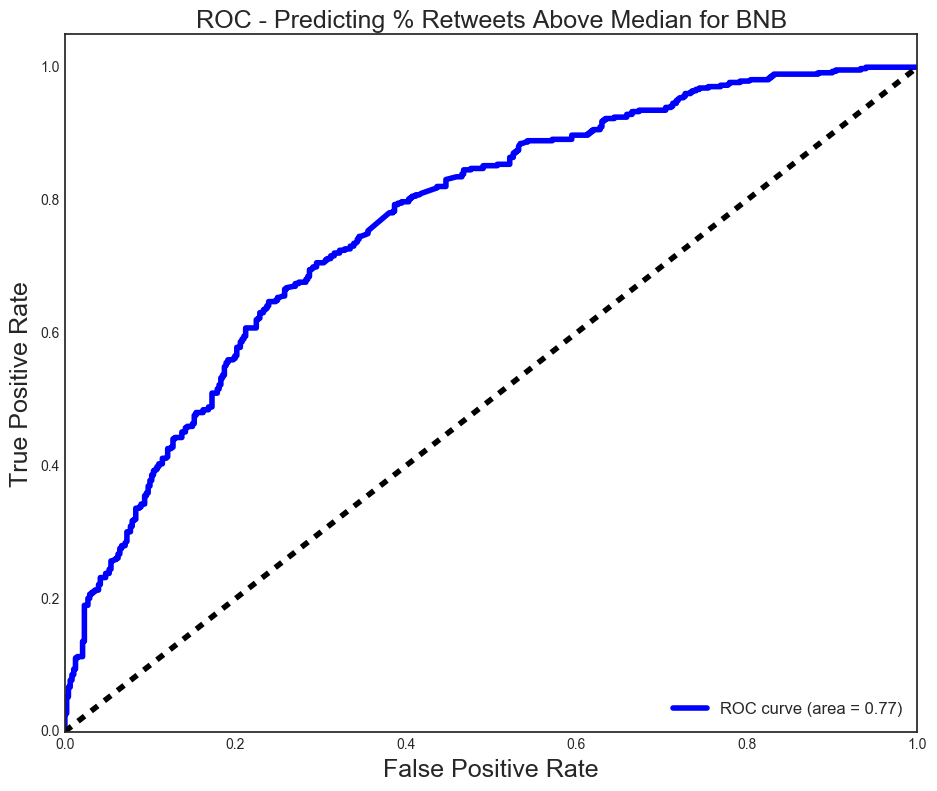

In [385]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline



#Y_score75 = glr.predict_proba(X_test75)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(ytnv5_test, ytnv5_pred_viral)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC - Predicting % Retweets Above Median for BNB', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [380]:
Y_score75


array([-1.47816431, -1.99433654, -0.90825052, ..., -0.98932808,
       -1.67669293, -0.38259846])

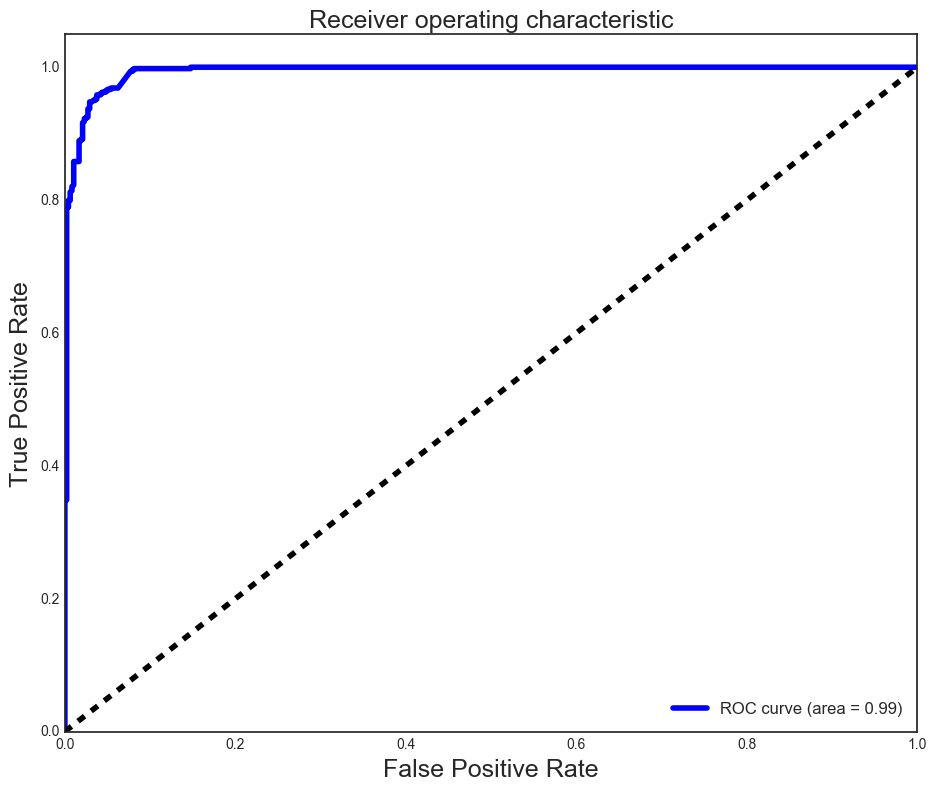

In [399]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline



#Y_score75 = glr.decision_function(X_test75)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[0], TPR[0], _ = roc_curve(ytnv75_test, manual_pred_viral)
ROC_AUC[0] = auc(FPR[0], TPR[0])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[0], TPR[0], label='ROC curve (area = %0.2f)' % ROC_AUC[0], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [47]:
FPR

{0: array([  0.00000000e+00,   0.00000000e+00,   1.33797164e-04, ...,
          9.94915708e-01,   9.94915708e-01,   1.00000000e+00])}

In [592]:
#lr_features_df.head(10)

In [449]:
stop_ngram_counts_xtt5 = []
for header in list(df_lr_xtt5train_tfidf):
    value = df_lr_xtt5train_tfidf[header].sum()
    stop_ngram_counts_xtt5.append((header,value))
    
stop_ngram_counts_xtt5.sort(key=lambda x: x[1], reverse = True)

In [513]:
#looking at coefficients 
log_get_co(lr_xtt5, df_lr_xtt5train_tfidf)

,Coefficient,Abs_Coefficient
super bowl,-1.620494,1.620494
president trump,1.468844,1.468844
betsy devos,1.071761,1.071761
white house,1.045665,1.045665
elizabeth warren,1.038466,1.038466
sean spicer,1.024790,1.024790
trump travel,0.977986,0.977986
kellyanne conway,0.956182,0.956182
trump travel ban,0.928986,0.928986
need know,-0.924660,0.924660


In [467]:
lrtt_features_df = log_get_co(lr_xtt5, df_lr_xtt5train_tfidf)
lrtt_topfeatures_df = lrtt_features_df[lrtt_features_df.Abs_Coefficient >=.6]


In [502]:
#log_get_co(lr_xtv75, df_lr75)

In [503]:
lr_xtv75_features = log_get_co(lr_xtv75, df_lr75)
lr_xtv75_topfeatures = lr_xtv75_features[lr_xtv75_features.Abs_Coefficient >=.9]

In [504]:
lr_xtv75_topfeatures.to_csv('/Users/davidbeightol/Documents/DSI/data_sets/lrtt75_topfeatures.csv')

In [468]:
lrtt_topfeatures_df.to_csv('/Users/davidbeightol/Documents/DSI/data_sets/lrtt_topfeatures.csv')

In [438]:
lr_topfeatures_df = lr_features_df[lr_features_df.Abs_Coefficient >=.75]

In [417]:
log_get_co(glr, X_train75)

In [15]:
lr = LogisticRegression(penalty='l2')

In [16]:
#lr.feature_importances_

In [17]:

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits = X_train
y_digits = y_train

In [10]:
rfc = RandomForestClassifier(criterion = 'entropy')

In [27]:
#rfc.feature_importances_

In [28]:
from sklearn.feature_selection import SelectFromModel

In [29]:
rfc_reduced = SelectFromModel(rfc, prefit=True)

In [32]:
X_train_new = rfc_reduced.transform(X_train)

In [33]:
X_test_new = rfc_reduced.transform(X_test)

In [30]:
run_model(rfc, X_train75, X_test75, y_train75, y_test75)

0.747149631722
      0    1
0  7081  393
1  2113  324
             precision    recall  f1-score   support

          0       0.77      0.95      0.85      7474
          1       0.45      0.13      0.21      2437

avg / total       0.69      0.75      0.69      9911



In [16]:
def tree_get_co(model, X):
    cos = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Coefficient'])
    return cos.sort_values('Coefficient', ascending=False)


In [333]:
tree_get_co(t5rfc, Xt5)

,Coefficient
hour,0.332492
subjectivity,0.293869
polarity,0.288094
Sun,0.021225
Mon,0.017355
Thu,0.014343
Sat,0.012105
Wed,0.010440
Tue,0.010078
